In [1]:
import pandas as pd
import os
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import time
import folium



In [2]:
#df visualizer
FHV = pd.read_csv(r'C:\Users\addis\OneDrive\COLLEGE\!Fall2025\Geog573\final_project\For_Hire_Vehicles__FHV__-_Active_20250415.csv')

FHV.head()

,Active,Vehicle License Number,Name,License Type,Expiration Date,Permit License Number,DMV License Plate Number,Vehicle VIN Number,Wheelchair Accessible,Certification Date,...,Base Name,Base Type,VEH,Base Telephone Number,Website,Base Address,Reason,Order Date,Last Date Updated,Last Time Updated
0,YES,5614672,"DAUD,&,SONS,INC",FOR HIRE VEHICLE,05/12/2025,NaN,T796981C,4T1B11HK2JU628634,NaN,NaN,...,"UBER USA, LLC",BLACK-CAR,NaN,(646)780-0129,NaN,1515 THIRD STREET SAN FRANCISCO CA 94158,G,NaN,04/15/2025,13:25
1,YES,5013452,"MORDUKHAYEV,ARKADIY",FOR HIRE VEHICLE,07/29/2025,NaN,T628128C,4T1BK1EB3FU160017,NaN,NaN,...,PLANET LIMOUSINE LLC,LUXURY,NaN,(800)805-9251,NaN,202 JERICHO TURNPIKE FLORAL PARK NY 11001,G,NaN,04/15/2025,13:25
2,YES,5887056,"77,ST,OPERATIONS,INC",FOR HIRE VEHICLE,08/13/2026,NaN,T762837C,4T1C31AK0RU630600,NaN,NaN,...,"UBER USA, LLC",BLACK-CAR,NaN,(646)780-0129,NaN,1515 THIRD STREET SAN FRANCISCO CA 94158,G,NaN,04/15/2025,13:25
3,YES,5903123,"DWOMOH,,KWABENA",FOR HIRE VEHICLE,10/26/2026,NaN,CH1NO5,1HGCV1F32JA205208,NaN,NaN,...,"UBER USA, LLC",BLACK-CAR,NaN,(646)780-0129,NaN,1515 THIRD STREET SAN FRANCISCO CA 94158,G,NaN,04/15/2025,13:25
4,YES,5651751,"ZAMAN,KHALED,UZ",FOR HIRE VEHICLE,10/13/2025,NaN,T662266C,1GNSKHKCXKR177895,NaN,NaN,...,"CAVALIER CAR & LIMOUSINE, INC.",BLACK-CAR,NaN,(718)454-2900,CAVALIERLIMO.COM,185-08 UNION TURNPIKE FRESH MEADOWS NY 11366,G,NaN,04/15/2025,13:25


In [3]:
#df info
FHV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106330 entries, 0 to 106329
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Active                    106330 non-null  object 
 1   Vehicle License Number    106330 non-null  object 
 2   Name                      106330 non-null  object 
 3   License Type              106330 non-null  object 
 4   Expiration Date           106330 non-null  object 
 5   Permit License Number     1352 non-null    object 
 6   DMV License Plate Number  106330 non-null  object 
 7   Vehicle VIN Number        106330 non-null  object 
 8   Wheelchair Accessible     8077 non-null    object 
 9   Certification Date        3832 non-null    object 
 10  Hack Up Date              3816 non-null    object 
 11  Vehicle Year              106330 non-null  int64  
 12  Base Number               106330 non-null  object 
 13  Base Name                 106330 non-null  o

In [4]:
#null values
FHV.isnull().sum()

Active                           0
Vehicle License Number           0
Name                             0
License Type                     0
Expiration Date                  0
Permit License Number       104978
DMV License Plate Number         0
Vehicle VIN Number               0
Wheelchair Accessible        98253
Certification Date          102498
Hack Up Date                102514
Vehicle Year                     0
Base Number                      0
Base Name                        0
Base Type                        0
VEH                          72000
Base Telephone Number            0
Website                      96417
Base Address                     0
Reason                           0
Order Date                  106330
Last Date Updated                0
Last Time Updated                0
dtype: int64

In [5]:
print(f'non active count: {(FHV["Active"] != "YES").sum()}')
print(f'active count: {(FHV["Active"] == "YES").sum()}')

#all rows are active aparently


non active count: 0
active count: 106330


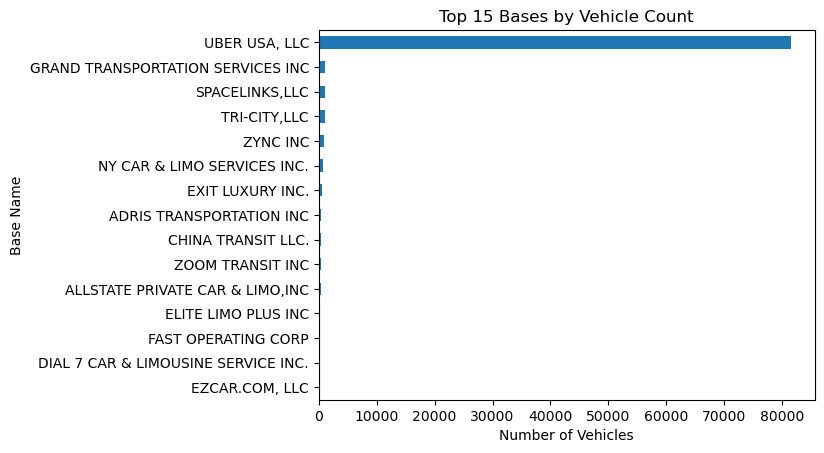

Base Name
UBER USA, LLC                          81561
GRAND TRANSPORTATION SERVICES INC       1108
SPACELINKS,LLC                          1091
TRI-CITY,LLC                            1062
ZYNC INC                                 830
NY CAR & LIMO SERVICES INC.              781
EXIT LUXURY INC.                         556
ADRIS TRANSPORTATION INC                 443
CHINA TRANSIT LLC.                       388
ZOOM TRANSIT INC                         377
ALLSTATE PRIVATE CAR & LIMO,INC          377
ELITE LIMO PLUS INC                      275
FAST OPERATING CORP                      271
DIAL 7 CAR & LIMOUSINE SERVICE INC.      260
EZCAR.COM, LLC                           255
Name: count, dtype: int64


In [6]:
#top 15 company distributions

top_bases = FHV["Base Name"].value_counts().head(15)

top_bases.plot(kind='barh', title="Top 15 Bases by Vehicle Count")
plt.xlabel("Number of Vehicles")
plt.ylabel("Base Name")
plt.gca().invert_yaxis()
plt.show()

print(FHV['Base Name'].value_counts().head(15))


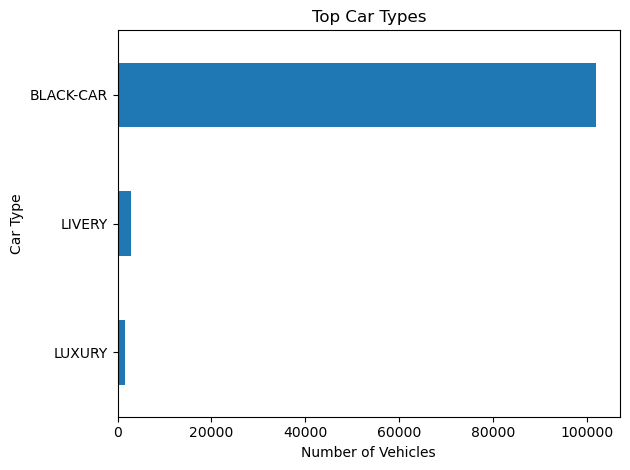

Base Type
BLACK-CAR    101958
LIVERY         2818
LUXURY         1554
Name: count, dtype: int64


In [7]:
#top car types
car_type = FHV["Base Type"].value_counts()

car_type.plot(kind="barh", title="Top Car Types")
plt.xlabel("Number of Vehicles")
plt.ylabel("Car Type")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(FHV["Base Type"].value_counts())


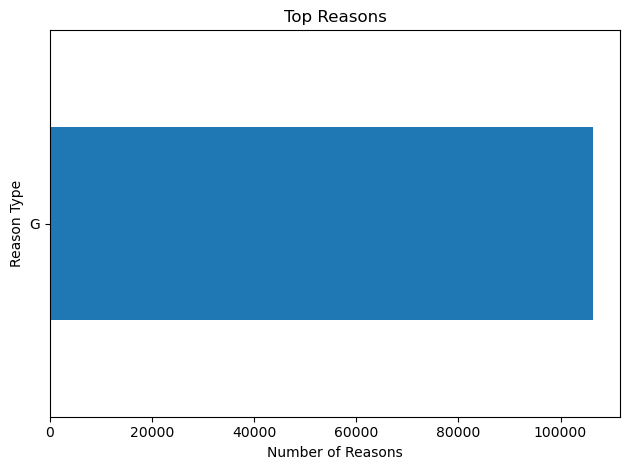

Reason
G    106330
Name: count, dtype: int64


In [ ]:
#all reasons are G apparently
car_type = FHV["Reason"].value_counts()

car_type.plot(kind="barh", title="Top Reasons")
plt.xlabel("Number of Reasons")
plt.ylabel("Reason Type")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(FHV["Reason"].value_counts())


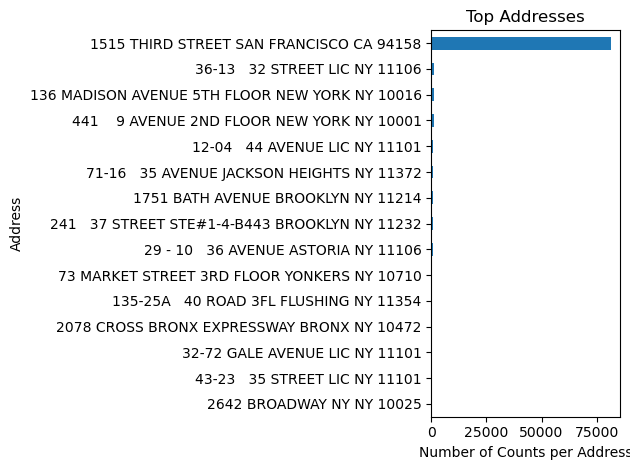

Number of Different Addresses: Base Address
1515 THIRD STREET SAN FRANCISCO CA 94158            81561
36-13   32 STREET LIC NY 11106                       1108
136 MADISON AVENUE 5TH FLOOR NEW YORK NY 10016       1091
441    9 AVENUE 2ND FLOOR NEW YORK NY 10001          1062
12-04   44 AVENUE LIC NY 11101                        830
                                                    ...  
37-08  100 STREET CORONA NY 11368                       1
1378 SWEETMAN AVE 2 ELMONT NY 11003                     1
400 COLUMBUS AVENUE SUITE 160E VALHALLA NY 10595        1
1311   51 STREET BROOKLYN NY 11219                      1
175 PEARL STREET FLOOR 1-3 BROOKLYN NY 11201            1
Name: count, Length: 714, dtype: int64


In [ ]:
#addresses are just the company addresses so nothing really interesting here
car_type = FHV["Base Address"].value_counts().head(15)

car_type.plot(kind="barh", title="Top Addresses")
plt.xlabel("Number of Counts per Address")
plt.ylabel("Address")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f'Number of Different Addresses: {FHV["Base Address"].value_counts()}')
